# Principle Component Analysis Implementation 

In [1]:
import pandas as pd
from sklearn import datasets, decomposition
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [2]:
dataset = datasets.load_iris()

In [3]:
X = dataset['data']
y = dataset['target']

In [4]:
target_names = dataset.target_names

In [5]:
X_std = StandardScaler().fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
pca = PCA(n_components=2)

In [8]:
X_pca = pca.fit_transform(X_std)

In [9]:
X_train = pca.fit_transform(X_train)

In [10]:
X_test = pca.transform(X_test)

In [11]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

In [12]:
pca.components_

array([[ 0.36873621, -0.06977632,  0.85630117,  0.35484246],
       [ 0.68187006,  0.69682861, -0.1867726 , -0.12082672]])

In [13]:
pca.explained_variance_ratio_

array([0.9201008 , 0.05494812])

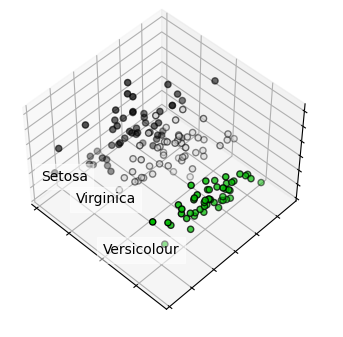

In [14]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

pca = decomposition.PCA(n_components=3)

pca.fit(X)

X = pca.transform(X)
y = np.choose(y, [1, 2, 0]).astype(float)


for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

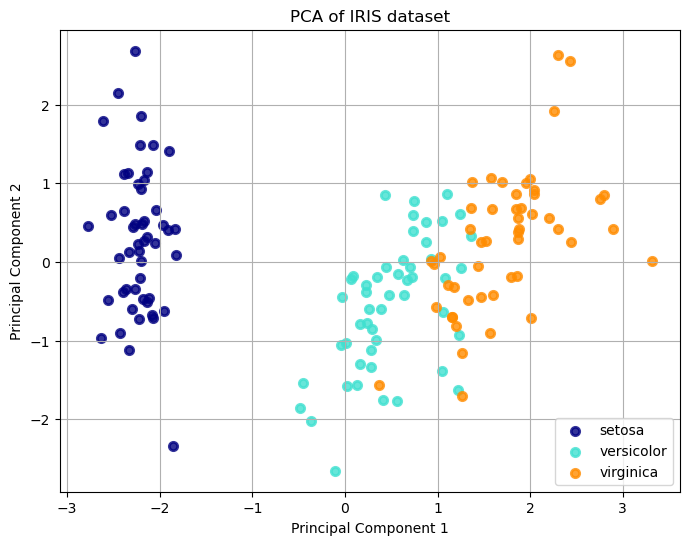

In [15]:
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(df_pca.loc[df_pca['target'] == i, 'PC1'],
                df_pca.loc[df_pca['target'] == i, 'PC2'],
                color=color, alpha=.8, lw=lw,
                label=target_name)

plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid()
plt.show()